<a href="https://colab.research.google.com/github/suzanagomes/Projeto-Final---DATA-SCIENCE---Descomplica/blob/main/Projeto_final_Suzana_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 *Projeto Final - PÓS-GRADUAÇÃO EM DATA SCIENCE  (Pitch | Avaliação do módulo 3)*
 # **SUZANA DE ARAUJO GOMES**

<br>
PÓS-GRADUAÇÃO EM DATA SCIENCE<br>
FEV/2024

Este é um projeto de machine learning para verificar se os usuários que efetuaram ou não uma compra em um site (**Anúncios de redes sociais**).
<br>
Comecei pegando os dados do dataset do Kaggle de **Social Network Ads**. Porém olhando para o dataset, ele só tinha 400 linhas e 5 colunas. Então para efeito de estudo, fiz através do pandas a criação de um novo dataset fake com 1000 linhas, utilizando as mesmas colunas do dataset original.
<br>
<br>
Dataset original [Kaggle](https://www.kaggle.com/datasets/dragonheir/logistic-regression/data)
<br>
Dataset criado para o trabalho [código aqui](https://colab.research.google.com/drive/1uow3q_NRykgsv6fjzOXMWEHg9B2zlPJY?usp=sharing).
<br>
Arquivo gerado e usado no trabalho em parquet [arquivo aqui](https://drive.google.com/file/d/1idl1wTQmtlBpxJMG20TTHI93ZEL6SPDD/view?usp=sharing).

<br>

🚩PROBLEMA:
Prever quais clientes estimulados pelos anúncios farão ou não uma compra.<br>
Como: Através da criação de um modelo de regressão.

🕵PONTOS Do trabalho:

- Explorar a correlação entre as variáveis do conjunto de dados, identificando padrões e relações que possam influenciar nas decisões de compra dos usuários.
- Desenvolver um modelo preditivo capaz de estimar se um usuário, ao interagir com um anúncio, está propenso a efetuar uma compra. Foi utilizado técnicas de Regressão Logística para alcançar essa previsão.
- Testar o modelo com novas entradas de dados simuladas, permitindo uma avaliação prática da eficácia do modelo em prever o comportamento de compra de usuários estimulados por anúncios.



# 🗂️Bibliotecas, carregamentos e ETL

## Importação das Bibliotecas e carregamento do dados

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

import warnings #gerenciar avisos
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             roc_curve,
                             roc_auc_score)
from imblearn.over_sampling import SMOTE
from tabulate import tabulate
import gc #usado para liberar memória

# Definição de parâmetros globais
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


Carregamento dos dados

In [ ]:
# Efetuando limpeza de memória antes do carregamento de dados
gc.collect()

# Caminho do arquivo
path = '/content/dados_social_ads.parquet'

# Criando um dataframe a partir do arquivo no diretório dados
df = pd.read_parquet(path)

Dicionário de dados

- Id_usuario: Id exclusivo para identificação do usuário
- Genero: Gênero (masculino ou feminino)
- Idade: Idade do usuário
- Salario Estimado: Salário estimado do usuário
- Compra:  1 se o usuário efetuou uma compra via anúncio ou 0 se não houve compra

In [ ]:
#Informações detalhadas sobre o DataFrame
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_usuario        1000 non-null   int64  
 1   Genero            1000 non-null   object 
 2   Idade             1000 non-null   int64  
 3   Salario_Estimado  1000 non-null   float64
 4   Compra            1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 95.4 KB


In [ ]:
#criando um backup
df_backup = df.copy()

## Verificando e fazendo tratamentos necessários


In [ ]:
df.head(5)

,Id_usuario,Genero,Idade,Salario_Estimado,Compra
0,1,Masculino,56,235755.137106,1
1,2,Masculino,46,158227.024343,1
2,3,Masculino,32,167283.053448,1
3,4,Feminino,60,252564.822559,1
4,5,Masculino,25,116576.501350,1


In [ ]:
# Quantidade de linhas e colunas
df.shape

(1000, 5)

## Identificando a quantidade de valores duplicados (True)

In [ ]:
df.duplicated(keep='first').value_counts()

False    1000
dtype: int64

## Verificando a quantidade de valores únicos e nulos

In [ ]:
df.nunique()

Id_usuario          1000
Genero                 2
Idade                 47
Salario_Estimado    1000
Compra                 2
dtype: int64

In [ ]:
df.isnull().sum()

Id_usuario          0
Genero              0
Idade               0
Salario_Estimado    0
Compra              0
dtype: int64

## Removendo colunas que não serão utilizadas e renomeando colunas

In [ ]:
df = df.drop(columns=['Id_usuario'])

In [ ]:
df.rename(columns={'Genero': 'genero',
                   'Idade': 'idade',
                   'Salario_Estimado': 'salario_estimado',
                   'Compra': 'compra'},
          inplace=True)

## Transformando os valores da categoria 'genero' em categorias distintas e traduzindo os valores da categoria 'genero' em colunas binárias usando One-Hot Encoding

In [ ]:
#Transformação dos valores da categoria 'genero' em categorias distintas e o resultado é armazenado em arr_genero.
#Renomeia as colunas binárias resultantes de 'arr_genero' para 'feminino' e 'masculino',
#indicando a presença ou ausência de cada categoria

arr_genero = OneHotEncoder().fit_transform(
    df['genero'].values.reshape(-1, 1)).toarray()
df_genero = pd.DataFrame(arr_genero)
df_genero.rename(columns={0: 'feminino', 1: 'masculino'}, inplace=True)
df = pd.concat([df, df_genero], axis=1)
df.head(10)


,genero,idade,salario_estimado,compra,feminino,masculino
0,Masculino,56,235755.137106,1,0.0,1.0
1,Masculino,46,158227.024343,1,0.0,1.0
2,Masculino,32,167283.053448,1,0.0,1.0
3,Feminino,60,252564.822559,1,1.0,0.0
4,Masculino,25,116576.501350,1,0.0,1.0
5,Masculino,38,251988.234479,1,0.0,1.0
6,Masculino,56,405597.340015,1,0.0,1.0
7,Feminino,36,164627.430656,1,1.0,0.0
8,Masculino,40,152248.655262,1,0.0,1.0
9,Masculino,28,77365.446325,1,0.0,1.0


# 📈 1.Análise das medidas estatísticas dos dados

In [ ]:
#Descrição dos dados estatístico
df[['idade', 'salario_estimado']].describe().T


,count,mean,std,min,25%,50%,75%,max
idade,1000.0,40.986000,13.497852,18.000000,29.000000,42.000000,52.00000,64.000000
salario_estimado,1000.0,177788.744063,79181.222063,36077.448929,118687.425371,162829.115867,227071.24923,439201.973702


Idade:

Média (mean): A idade média é aproximadamente 41 anos.<br>
Desvio padrão (std): O desvio padrão é cerca de 13.5 anos, indicando a dispersão dos dados em relação à média.<br>
Valores Mínimos (min) e Máximos (max): A idade mínima é 18 anos e a máxima é 64 anos.<br>
Quartis (25%, 50%, 75%): Os quartis indicam a distribuição dos dados:
* 25% dos dados têm 29 anos ou menos,<br>
* 50% têm 42 anos ou menos, <br>
* 75% têm 52 anos ou menos.
<br>

Salário Estimado:

Média (mean): A média do salário estimado é de aproximadamente 177.788.74 <br>
Desvio padrão (std): O desvio padrão é cerca de 79.181.22, indicando a dispersão dos dados em relação à média.<br>
Valores Mínimos (min) e Máximos (max): O salário mínimo estimado é 36.077.45, e o máximo é 439.201.97.<br>
Quartis (25%, 50%, 75%): Os quartis indicam a distribuição dos dados
* 25% dos dados têm salário estimado abaixo de 118.687.43, <br>
* 50% têm abaixo de 162.829.12,<br>
* 75% têm abaixo de 227.071.25.

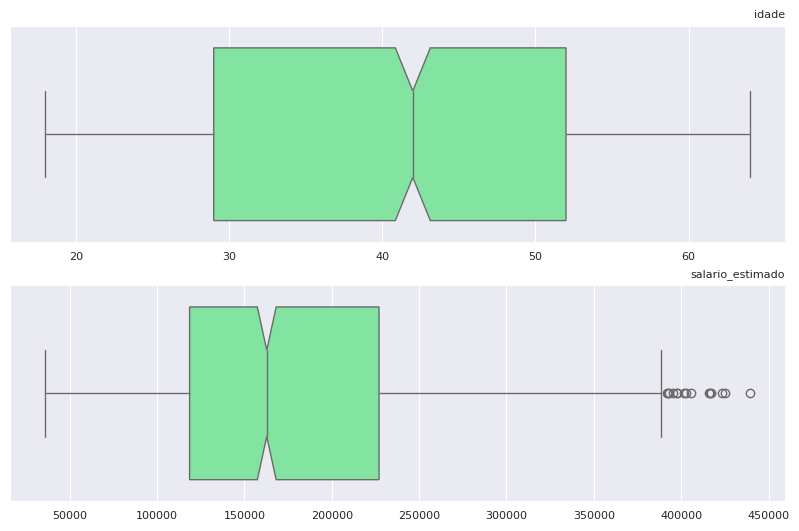

In [ ]:
def graf_boxplot(param1, param2, param3, param4='#72f49a'):
    sns.boxplot(data=param1, ax=param3, color=param4, notch=True, orient='h')
    param3.set(xlabel='', ylabel='')
    param3.tick_params(labelsize=8)
    param3.ticklabel_format(style='plain', axis='x')
    param3.set_title(param2, loc='right', fontsize=8)


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

graf_boxplot(df['idade'], 'idade', ax1)
graf_boxplot(df['salario_estimado'], 'salario_estimado', ax2)

plt.subplots_adjust(top=1.9, bottom=0.95)
plt.show()


# 👩🏽‍💻 2.Distribuição dos dados entre as variáveis independentes (features) e dependente (target)

Cada stripplot mostra a distribuição dos dados para duas variáveis específicas, destacando a influência da variável categórica "compra". Isso ajuda a visualizar como diferentes variáveis se relacionam com a variável de resposta "compra".

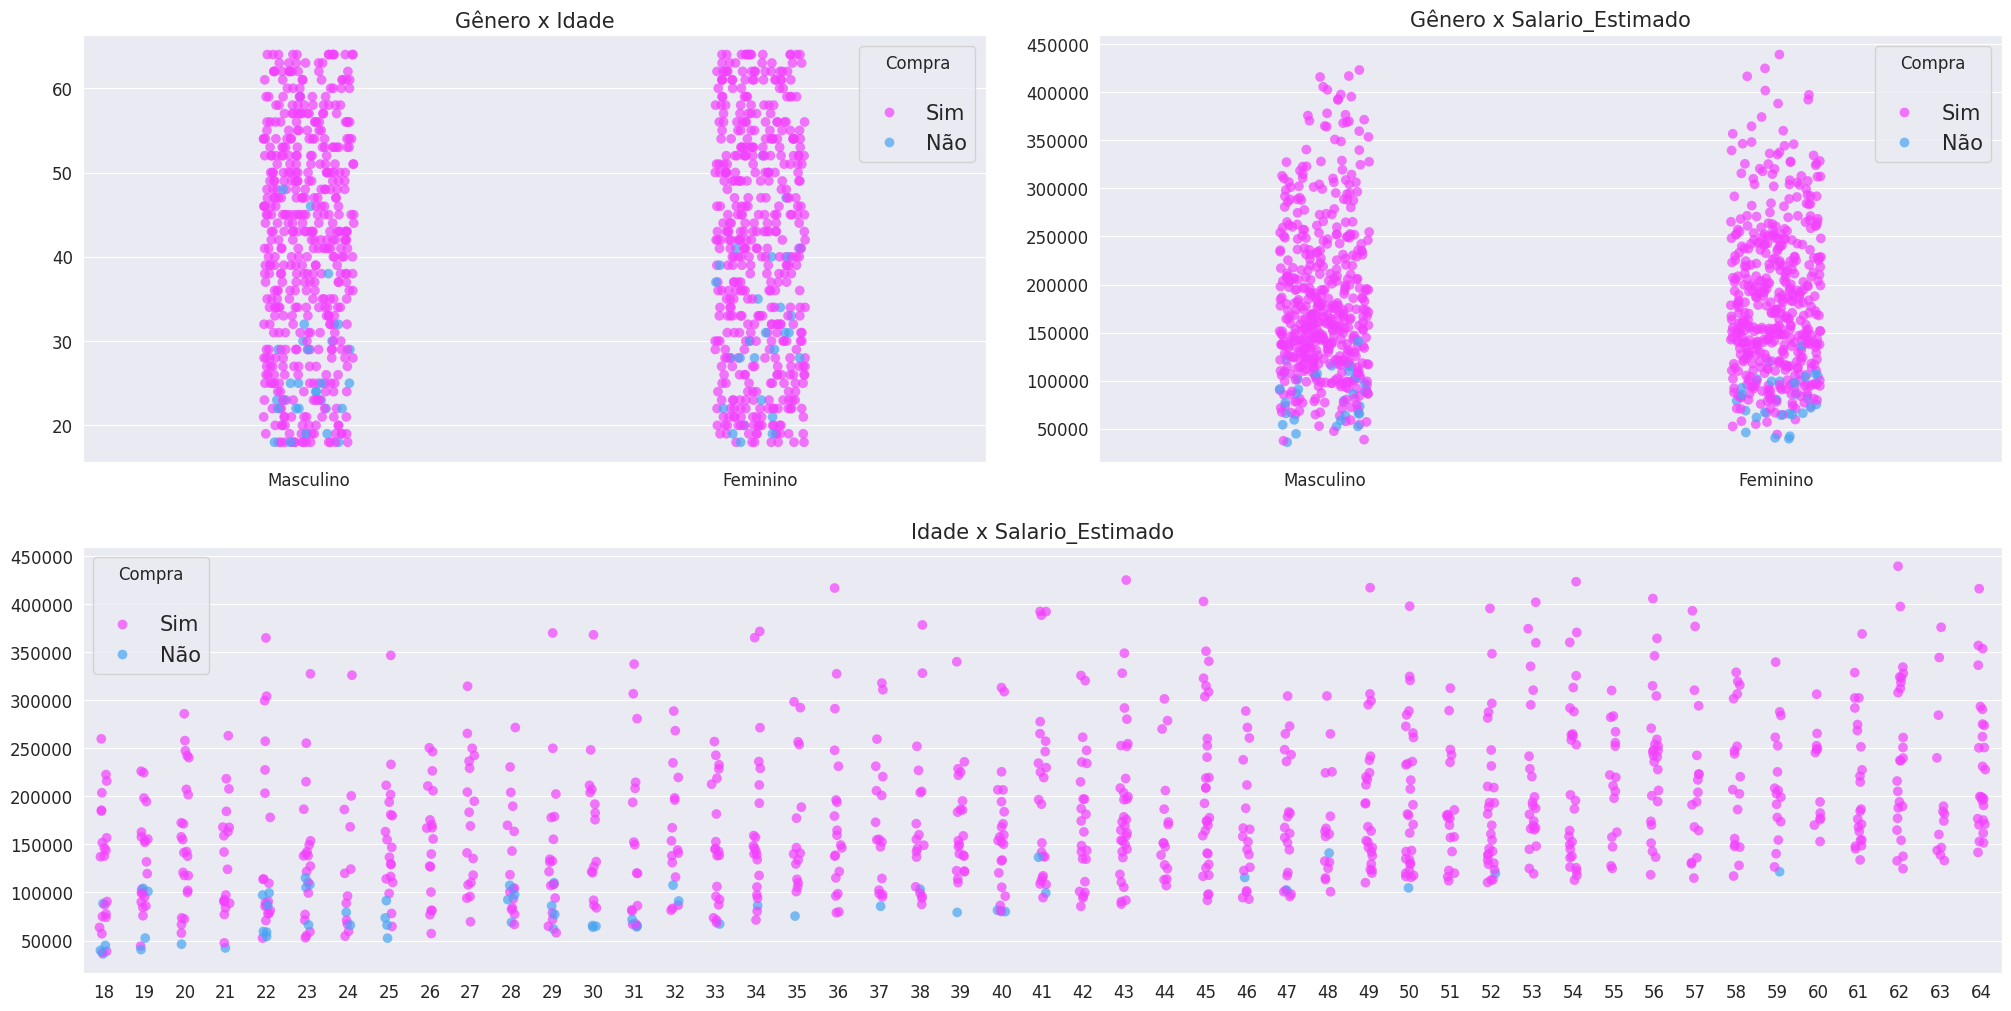

In [ ]:
# Função para gerar gráficos stripplot
#stripplot é uma função da biblioteca Seaborn em Python utilizada para criar gráficos de dispersão univariados.
# param1: nome do dataframe
# param2: variável do eixo X
# param3: variável do eixo Y
# param4: axis  - O objeto de eixo onde o gráfico será desenhado.
# param5: GridSpec - O layout do subplot.
# param6: label para gráfico
# param7: paleta de cores para a variável categórica (compra), default: crest

compra = df['compra'].replace({1: 'Sim', 0: 'Não'})


def graf_2_stripplot(param1, param2, param3, param4, param5, param6):
    param4 = fig.add_subplot(param5)

    # Defina as cores desejadas
    palette = {'Sim': '#f341ff', 'Não': '#47a5f3'}

    sns.stripplot(data=param1, x=param2, y=param3,
                  ax=param4, hue=compra, palette=palette, s=7, alpha=0.7)

    param4.set(xlabel='', ylabel='')
    param4.legend(title='Compra\n', fontsize=15, title_fontsize=12)
    param4.tick_params(labelsize=12)
    param4.ticklabel_format(style='plain', axis='y')
    param4.set_title(param6, fontsize=15)

fig = plt.figure(figsize=(20, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax1 = ax2 = ax3 = None

graf_2_stripplot(df, 'genero', 'idade', ax1, spec[0, 0], 'Gênero x Idade')
graf_2_stripplot(df, 'genero', 'salario_estimado', ax2, spec[0, 1], 'Gênero x Salario_Estimado')
graf_2_stripplot(df, 'idade', 'salario_estimado', ax3, spec[1, 0:], '\nIdade x Salario_Estimado')
plt.show()


<Figure size 600x300 with 0 Axes>

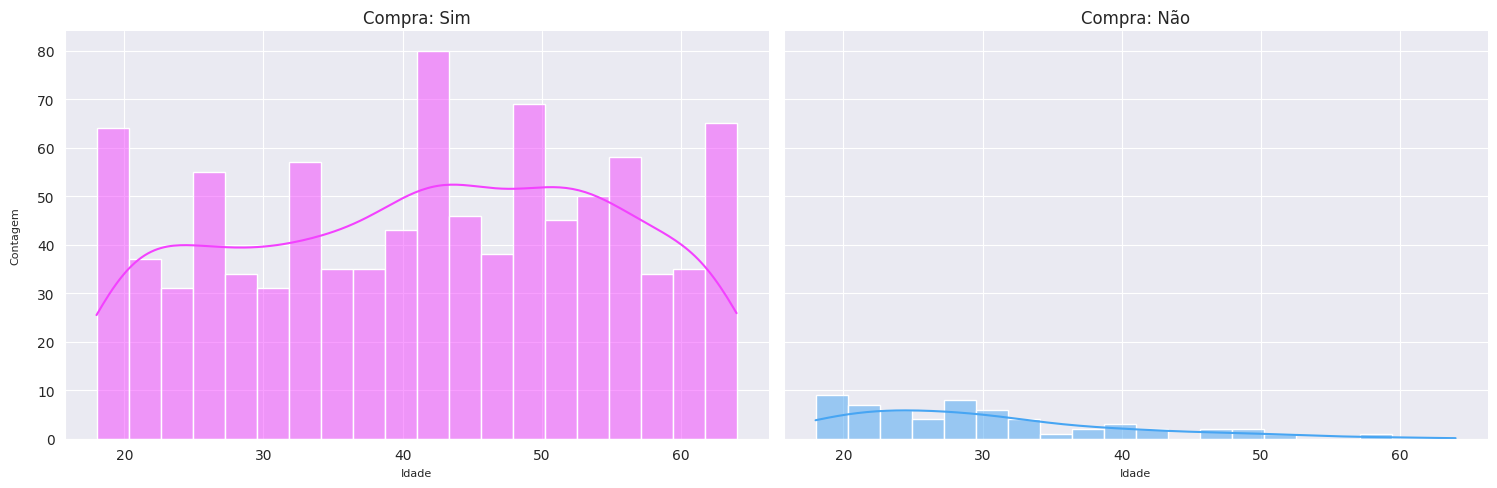

<Figure size 600x300 with 0 Axes>

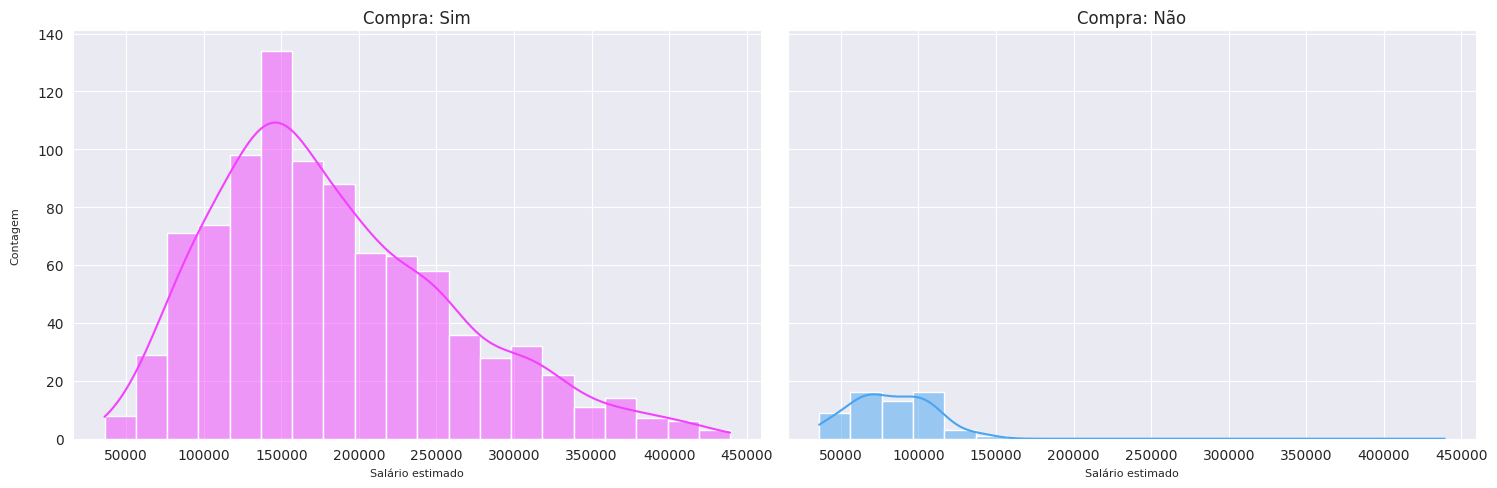

<Figure size 600x300 with 0 Axes>

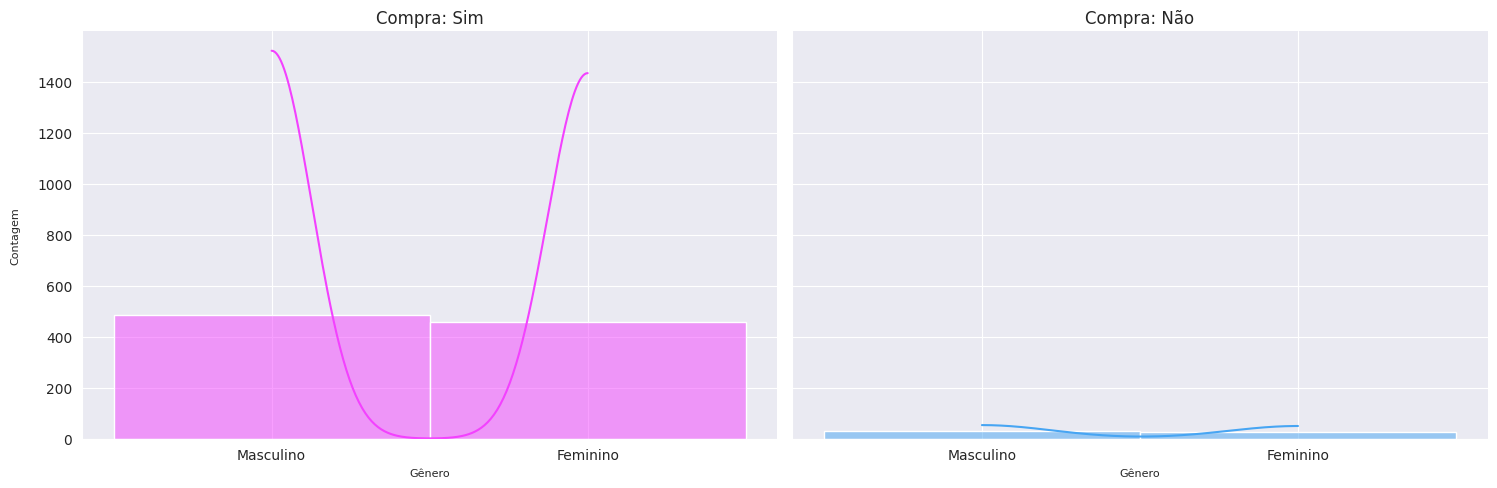

In [ ]:
# Função para gerar gráficos displot
# param1: nome do dataframe
# param2: variável do eixo X
# param3: label para gráfico
# param4: cor

compra = df['compra'].replace({1: 'Sim', 0: 'Não'})

def graf_displot(param1, param2, param3):
    plt.figure(figsize=(6, 3))
    plot = sns.displot(data=param1, x=param2, col=compra, kde=True, bins=20, hue=compra, palette={'Sim': '#f341ff', 'Não': '#47a5f3'}, legend=False, aspect=1.5)

    # Ajustando os títulos
    plot.set_axis_labels(param3, 'Contagem\n', size=8)
    plot.set_titles(col_template='Compra: {col_name}', size=12)

    plt.show()

# Exemplo de uso com cores rosa ('Sim') e azul ('Não')
graf_displot(df, 'idade', 'Idade')
graf_displot(df, 'salario_estimado', 'Salário estimado')
graf_displot(df, 'genero', 'Gênero')


# 🕵️‍♂️ 3.Correlação entre as variáveis

In [ ]:
corr = df[['idade', 'masculino', 'feminino', 'salario_estimado', 'compra']].corr()
print(corr)


                     idade  masculino  feminino  salario_estimado    compra
idade             1.000000   0.005519 -0.005519          0.402406  0.209671
masculino         0.005519   1.000000 -1.000000         -0.010840 -0.001113
feminino         -0.005519  -1.000000  1.000000          0.010840  0.001113
salario_estimado  0.402406  -0.010840  0.010840          1.000000  0.299559
compra            0.209671  -0.001113  0.001113          0.299559  1.000000


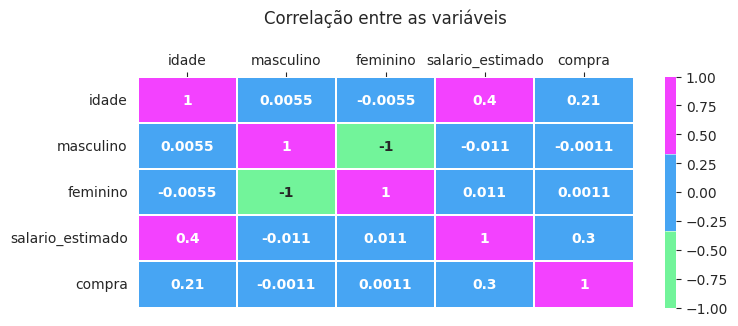

In [ ]:
corr = df[['idade', 'masculino', 'feminino', 'salario_estimado', 'compra']].corr()

# Definindo as cores desejadas
cores = ['#72f49a', '#47a5f3', '#f341ff']

plt.figure(figsize=(8, 3))
plot = sns.heatmap(data=corr,
                   annot=True, annot_kws={'size': 10, 'fontweight': 'bold'},
                   cbar_kws={'extendfrac': .1, 'drawedges': True},
                   cmap=sns.color_palette(cores),  # Use a paleta de cores personalizada
                   vmin=-1, linewidths=.2,
                   xticklabels=['idade', 'masculino', 'feminino', 'salario_estimado', 'compra'],
                   yticklabels=['idade', 'masculino', 'feminino', 'salario_estimado', 'compra']
                   )
plot.set_yticklabels(plot.get_yticklabels(), rotation=0)
plot.set_title('Correlação entre as variáveis\n', loc='center', fontsize=12)
plot.tick_params(labelsize=10)
plot.xaxis.tick_top()
plt.show()


A matriz de correlação é uma tabela que mostra o coeficiente de correlação entre muitas variáveis. O valor é na faixa de -1 a 1. Se o valor for próximo a 1, isso significa que há uma forte correlação positiva entre as duas variáveis. Se for próximo a -1, há uma forte correlação negativa. Pontos de Destaque:
* Idade e Salário Estimado: Existe uma correlação moderada positiva (0.40), o que sugere que, em geral, pessoas com salários estimados mais altos tendem a ter uma idade um pouco maior.
* Idade e Compra: Há uma correlação fraca a moderada positiva (0.21), o que indica que a idade pode ter alguma influência nas decisões de compra, mas não é um fator dominante.
* Salário Estimado e Compra: Existe uma correlação moderada positiva (0.30), indicando que pessoas com salários estimados mais altos podem ter maior propensão a realizar compras

# 📊 4.Criação do modelo de regressão logística

## 1.Separação dos dados de treino e teste

In [ ]:
#1- Definição das Features e do Target:
# Features, variáveis independentes
X = df.drop(['compra', 'genero'], axis=1)

# Target, variável dependente
y = df['compra'].copy()

# 2- Padronizando os dados das features
std = StandardScaler().fit(X)
X = std.transform(X)

#3-Separação dos Dados em Treino e Teste:

# Definindo o percentual de dados para teste
perc = 0.25

# Definindo o random_state
seed = 10

# Separação dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=perc, random_state=seed)

print('\nQuantidade de dados divididos em treino e teste:')
print('\nX_train:', X_train.shape)
print('y_train:', y_train.shape)
print('\nX_test:', X_test.shape)
print('y_test:', y_test.shape)



Quantidade de dados divididos em treino e teste:

X_train: (750, 4)
y_train: (750,)

X_test: (250, 4)
y_test: (250,)


Explicando: <br> 750 amostras no conjunto de treinamento (X_train e y_train) <br> e 250 amostras no conjunto de teste (X_test e y_test).<br>  Cada amostra tem 4 features.


### Balanceamento

Aplicação do Balanceamento SMOTE: O desbalanceamento ocorre quando uma classe tem muito mais exemplos do que outra, o que pode levar a problemas de viés no modelo de machine learning.

In [ ]:
# aplicando balanceamento

print("\nDesbalanceado")
print(y_train.value_counts())

sample = SMOTE(sampling_strategy='minority', random_state=42)

X_train_b, y_train_b = sample.fit_resample(X_train, y_train)

print("\nBalanceado")
print(y_train_b.value_counts())



Desbalanceado
1    709
0     41
Name: compra, dtype: int64

Balanceado
1    709
0    709
Name: compra, dtype: int64


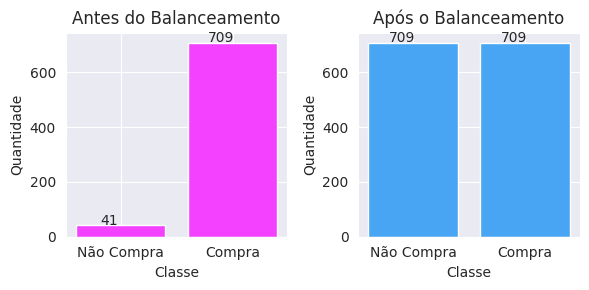

In [ ]:
# Definindo os valores antes e depois do balanceamento
desbalanceado = y_train.value_counts()
balanceado = y_train_b.value_counts()

# Criando um gráfico de barras
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
bars1 = plt.bar(desbalanceado.index, desbalanceado.values, color='#f341ff')
plt.title('Antes do Balanceamento', fontsize=12)
plt.xlabel('Classe', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)
plt.xticks([0, 1], ['Não Compra', 'Compra'])

for bar, value in zip(bars1, desbalanceado.values):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 15, str(value), ha='center', va='center', fontsize=10)

plt.subplot(1, 2, 2)
bars2 = plt.bar(balanceado.index, balanceado.values, color='#47a5f3')
plt.title('Após o Balanceamento', fontsize=12)
plt.xlabel('Classe', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)
plt.xticks([0, 1], ['Não Compra', 'Compra'])

for bar, value in zip(bars2, balanceado.values):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 15, str(value), ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Este dataframe possui um desbalanceamento significativo, com a classe 1 tendo muito mais exemplos do que a classe 0. Foi preciso aplicar a técnica de balanceamento chamada SMOTE (Synthetic Minority Over-sampling Technique), que cria novos exemplos sintéticos da classe minoritária (classe 0) para equilibrar as classes.

### Definição do modelo a ser utilizado nos dados

A escolha do solver 'liblinear' na Logistic Regression está relacionada ao tamanho do conjunto de dados. O 'liblinear' é mais adequado para conjuntos de dados menores, pois ele utiliza uma técnica de otimização específica para problemas de classificação binária com muitas características (como é comum em conjuntos de dados menores).<br>
Detalhes sobre o solver na biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
modelo_rl = LogisticRegression(solver='liblinear')
print('\nModelo selecionado:', modelo_rl)


Modelo selecionado: LogisticRegression(solver='liblinear')


## 2.Treinamento e predições do modelo <br><br>
Realizando o treinamento de um modelo de Regressão Logística e fazendo previsões nos dados de teste

In [ ]:
# treinamento do modelo
modelo_rl.fit(X_train_b, y_train_b)

# predição com dados de teste
pred_test = modelo_rl.predict(X_test)

pred_test #imprime as previsões feitas pelo modelo nos dados de teste.


array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1])

## 3.Métricas do modelo

As métricas do modelo são medidas utilizadas para avaliar o desempenho de um modelo de machine learning

### Acurácia

 A acurácia é uma métrica comum para avaliar o desempenho de um modelo de classificação e representa a proporção de previsões corretas em relação ao total de previsões.
 * É calculada pela fórmula: accuracy = (TP + TN) / (TP + TN + FP + FN), onde TN são os verdadeiros negativos.

In [ ]:
# Acurácia do modelo
acuracia = accuracy_score(y_test, pred_test) * 100
print('\nO modelo obteve %0.2f de acurácia.' % acuracia)


O modelo obteve 80.00 de acurácia.


A acurácia de 80.00% indica que o modelo de Regressão Logística teve uma precisão de 80% nas previsões feitas nos dados de teste.

### Matriz de confusão

A matriz de confusão fornece uma visão detalhada do desempenho do modelo de Regressão Logística na tarefa de classificação.<br>
É uma tabela composta por quatro quadrantes:Verdadeiros Positivos (TP), Verdadeiros Negativos (TN), Falsos Positivos (FP) e Falsos Negativos (FN).

In [ ]:
# Matriz de confusão, irá demonstrar visualmente as quantidades de previsões verdadeiras e que o modelo também identificou dessa forma
# os verdadeiros positivos (1 - sim) e os verdadeiros negativos (0 - não)

matrix = confusion_matrix(y_test, pred_test)

arr = matrix.T

data = {
    '': ['0', '1'],
    '0': [i for i in arr[0]],
    '1': [i for i in arr[1]],
}

print('\nMatriz de confusão')

print(tabulate(data, headers='keys', tablefmt='grid'))


Matriz de confusão
+----+-----+-----+
|    |   0 |   1 |
+====+=====+=====+
|  0 |  17 |   0 |
+----+-----+-----+
|  1 |  50 | 183 |
+----+-----+-----+


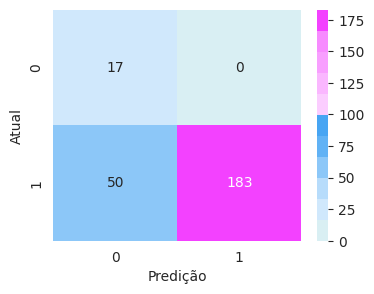

In [ ]:
# Calcula a matriz de confusão
matrix = confusion_matrix(y_test, pred_test)

# Plotagem da matriz de confusão com cores personalizadas
plt.figure(figsize=(4, 3))
sns.heatmap(matrix, annot=True, fmt='d', cmap=ListedColormap(['#D9EFF3','#D0E8FC', '#B7DCFB','#8CC7F8','#61B2F5','#47a5f3','#FBCDFF', '#FAB7FF','#F89FFF','#F78BFF','#f341ff']))
plt.xlabel('Predição')
plt.ylabel('Atual')
plt.show()

A interpretação é a seguinte:

* Verdadeiros Negativos (TN): 17 instâncias que eram da classe "0" foram corretamente classificadas como "0". - <br>
* Falsos Positivos (FP): 0 . Não houve instâncias da classe "0" que foram erroneamente classificadas como "1" (falsos positivos)<br>
* Falsos Negativos (FN): 50 instâncias que eram da classe "1" foram erroneamente classificadas como "0" (falsos negativos).< <br>
* Verdadeiros Positivos (TP): 183 instâncias que eram da classe "1" foram corretamente classificadas como "1". <br> <br>





### Classification_report

* Precision (Precisão): É a proporção de verdadeiros positivos (TP) em relação a todos os positivos previstos pelo modelo (TP + FP).

* Recall (Revocação ou Sensibilidade): É a proporção de verdadeiros positivos (TP) em relação a todos os valores positivos reais (TP + FN).

* F1-Score: É a média harmônica entre precisão e recall, fornecendo uma métrica balanceada entre os dois.

* Support: É o número de ocorrências de cada classe no conjunto de dados de teste.

* Accuracy (Acurácia): É a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões feitas.

* Macro Avg (Média Macro): É a média não ponderada das métricas para cada classe. Neste caso, é a média das precisões, recalls e F1-scores das classes 0 e 1.

* Weighted Avg (Média Ponderada): É a média das métricas para cada classe, ponderada pelo suporte de cada classe.

In [ ]:
print('\n', classification_report(y_test, pred_test))


               precision    recall  f1-score   support

           0       0.25      1.00      0.40        17
           1       1.00      0.79      0.88       233

    accuracy                           0.80       250
   macro avg       0.63      0.89      0.64       250
weighted avg       0.95      0.80      0.85       250



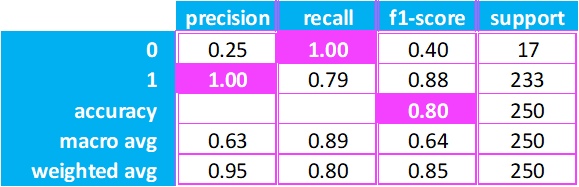

Explicando o resultado:
* Precision (Precisão): Para a classe 0, a precisão é baixa (0.25), o que indica que, das previsões positivas feitas pelo modelo para essa classe, apenas 25% eram realmente positivas.
Para a classe 1, a precisão é alta (1.00), o que indica que todas as previsões positivas feitas pelo modelo para essa classe estavam corretas.

* Recall (Revocação ou Sensibilidade): Para a classe 0, o recall é alto (1.00), o que indica que o modelo conseguiu identificar corretamente todos os casos positivos reais dessa classe.
Para a classe 1, o recall é menor (0.79), indicando que o modelo não conseguiu identificar todos os casos positivos reais, deixando alguns como falsos negativos.

* F1-Score:Para a classe 0, o F1-score é 0.40, indicando um desempenho geral baixo.Para a classe 1, o F1-score é 0.88, indicando um desempenho geral alto.

* Support: É o número de ocorrências de cada classe no conjunto de dados de teste.

* Accuracy (Acurácia):A acurácia total do modelo é de 0.80, o que indica que ele acertou 80% das previsões no conjunto de teste.

* Macro Avg (Média Macro): A média macro da precisão, recall e F1-score é de 0.63, 0.89 e 0.64, respectivamente.

* Weighted Avg (Média Ponderada):A média ponderada da precisão, recall e F1-score é de 0.95, 0.80 e 0.85, respectivamente.

### Curva ROC

A curva ROC (Receiver Operating Characteristic) é um gráfico que mostra o desempenho de um modelo de classificação binária em todos os limiares de discriminação possíveis. O eixo x representa a Taxa de Falso Positivo (FPR), enquanto o eixo y representa a Taxa de Verdadeiro Positivo (TPR).

O objetivo do Gráfico da curva ROC é avaliar quão bem um modelo pode distinguir entre duas classes, sendo especialmente útil quando as classes estão desbalanceadas. Quanto mais a curva se aproxima do canto superior esquerdo do gráfico, melhor é o desempenho do modelo.

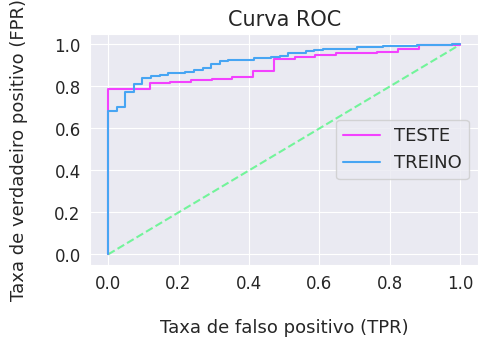

In [ ]:
# Calculando as probabilidades com dados de treino e teste
pred_test_prob = modelo_rl.predict_proba(X_test)[:, 1]
pred_train_prob = modelo_rl.predict_proba(X_train)[:, 1]

# Gera fpr (Taxa de falso positivo), tpr (Taxa de falso positivo) e thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test_prob)
fpr2, tpr2, thresholds2 = roc_curve(y_train, pred_train_prob)

# Gráfico da curva ROC com cores personalizadas
plt.figure(figsize=(5, 3))
plt.plot([0, 1], [0, 1], '--', color='#72f49a')  # Cor verde para a linha diagonal
plt.plot(fpr1, tpr1, label='TESTE', color='#f341ff')  # Cor rosa  para a curva de teste
plt.plot(fpr2, tpr2, label='TREINO', color='#47a5f3')  # Cor azul para a curva de treino
plt.tick_params(labelsize=12)
plt.xlabel('\nTaxa de falso positivo (TPR)', fontsize=13)
plt.ylabel('Taxa de verdadeiro positivo (FPR)\n', fontsize=13)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc='center right', fontsize=13)
plt.show()


A área sob a curva ROC (AUC- Area Under the Receiver Operating Characteristic Curve)) é uma medida comum usada para resumir a performance do modelo de classificação em ma única métrica.<br>
* Um AUC maior indica um melhor desempenho do modelo.<br>
* Essa métrica mede a capacidade do modelo de distinguir entre as classes positiva e negativa.<br>
* Um AUC de 0.5 indica classificação aleatória, enquanto um AUC de 1.0 sugere uma classificação perfeita.







AUC dados de teste:  0.9

AUC dados de treino: 0.93




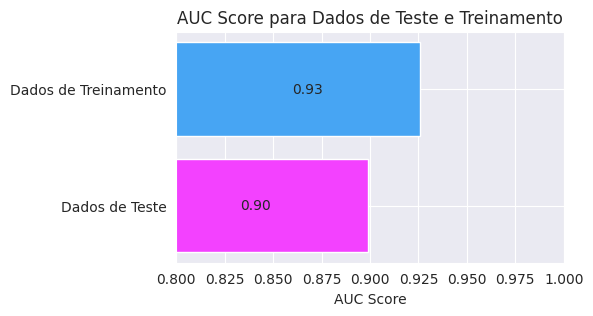

In [ ]:
# Calculando o AUC (Área sob a curva ROC)
auc_score_test = roc_auc_score(y_test, pred_test_prob)
auc_score_train = roc_auc_score(y_train, pred_train_prob)

print('\nAUC dados de teste: ', round(auc_score_test, 2))
print('\nAUC dados de treino:', round(auc_score_train, 2))
print('')

print('')

# Definindo os dados
labels = ['Dados de Teste', 'Dados de Treinamento']
auc_scores = [auc_score_test, auc_score_train]

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(5, 3))
bars = plt.barh(labels, auc_scores, color=['#f341ff', '#47a5f3'])
plt.xlabel('AUC Score')
plt.title('AUC Score para Dados de Teste e Treinamento')
plt.xlim(0.8, 1)  # Definindo o limite do eixo x para melhor visualização

# Adicionando o percentual ao lado das barras
for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center', ha='right')

plt.show()



* AUC nos Dados de Teste (0.90): O AUC nos dados de teste é 0.8987, o que indica uma boa capacidade do modelo de classificação em distinguir entre as classes. Quanto mais próximo de 1, melhor é o desempenho do modelo. Neste caso, um valor de 0.8987 sugere que o modelo tem uma boa capacidade discriminativa nos dados de teste.<br>

* AUC nos Dados de Treino (0.93): O AUC nos dados de treino é 0.9257, um valor um pouco mais alto do que o AUC nos dados de teste. Isso pode indicar que o modelo está se saindo muito bem na discriminação entre as classes nos dados de treino.<br>

* O fato de o AUC nos dados de teste ser próximo do AUC nos dados de treino sugere que o modelo generaliza bem para novos dados (não vistos durante o treinamento).<br>







### Cross Validation (validação cruzada)

A métrica do modelo utilizando Cross Validation (validação cruzada) é uma abordagem para avaliar o desempenho do modelo de uma maneira mais robusta, utilizando diferentes subconjuntos dos dados para treinamento e teste. <br>
Eles fornecem uma estimativa mais confiável da capacidade de generalização do modelo para novos dados.<br>
A métrica comumente usada nesse contexto é a acurácia, que representa a porcentagem de previsões corretas feitas pelo modelo.


Métrica do modelo utilizando Cross Validation

Score de cada fold: [97. 94. 94. 96. 95. 91. 95. 92. 94. 94.]

Score (média): 94.20



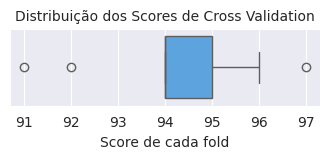

In [ ]:
# Definindo os valores dos hiperparâmetros
# definindo o número de folds, número de divisões dos dados
numero_folds = 10

# definindo o random_state
seed = 5

# Separando os dados em folds
kfold = KFold(n_splits=numero_folds, shuffle=True, random_state=seed)

# array de score de cada fold
resultado = cross_val_score(modelo_rl, X, y, cv=kfold)

print('\nMétrica do modelo utilizando Cross Validation')
print('\nScore de cada fold:', resultado * 100)
print('\nScore (média): {:.2f}'.format(resultado.mean() * 100))
print ('')

# Criando um gráfico de caixa
plt.figure(figsize=(4, 1))
sns.boxplot(x=resultado * 100, color='#47a5f3')
plt.xlabel('Score de cada fold', fontsize=10)
plt.title('Distribuição dos Scores de Cross Validation', fontsize=10)
plt.show()

* Scores de Cada Fold: Os scores de cada fold representam a acurácia do modelo em cada uma das partes (folds) em que o conjunto de dados foi dividido. Cada número é a porcentagem de previsões corretas obtidas em um fold específico durante o processo de validação cruzada.


* Score Médio:O score médio (94.2%) é a média dos scores de todos os folds. Essa média fornece uma estimativa geral do desempenho do modelo ao longo de diferentes conjuntos de treinamento e teste.Sugere que em média, acertou cerca de 94.2% das previsões durante a validação cruzada. Isso é um indicativo positivo de um bom desempenho do modelo.

* Embora a acurácia seja uma métrica valiosa, é importante considerar outras métricas, especialmente em casos de desequilíbrio de classes. Precision, recall, F1-score e matriz de confusão podem fornecer uma visão mais detalhada do desempenho do modelo em diferentes aspectos.
* Em resumo, a acurácia média de 94.2% indica que o modelo apresenta um bom desempenho médio ao ser testado em diferentes subconjuntos dos dados, demonstrando uma boa capacidade de generalização.

## 4.Previsões com novos dados

* Criando uma função para testar o modelo com novos dados,onde param1 é quantidade de entradas de novos dados.<br>
* A função teste_modelo, gera novos dados aleatórios, realiza a previsão do modelo para esses dados e retorna um DataFrame com os dados gerados e as previsões.



Tabela com novos dados:
╒════╤═════════╤═════════════╤════════════╤════════════════════╤══════════╕
│    │   idade │   masculino │   feminino │   salario_estimado │   compra │
╞════╪═════════╪═════════════╪════════════╪════════════════════╪══════════╡
│  0 │      37 │           1 │          0 │          206567.00 │        1 │
├────┼─────────┼─────────────┼────────────┼────────────────────┼──────────┤
│  1 │      61 │           1 │          0 │          173025.00 │        1 │
├────┼─────────┼─────────────┼────────────┼────────────────────┼──────────┤
│  2 │      34 │           0 │          1 │          237099.00 │        0 │
├────┼─────────┼─────────────┼────────────┼────────────────────┼──────────┤
│  3 │      19 │           0 │          1 │          112265.00 │        0 │
├────┼─────────┼─────────────┼────────────┼────────────────────┼──────────┤
│  4 │      60 │           1 │          0 │          303150.00 │        1 │
├────┼─────────┼─────────────┼────────────┼────────────────────

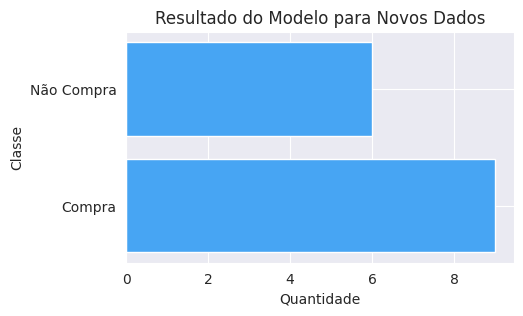

In [ ]:
def teste_modelo(param1):
    arrx = []

    for i in range(param1):
        idade = np.random.randint(df['idade'].min(), df['idade'].max())
        masculino = np.random.randint(2)
        if masculino == 1:
            feminino = 0
        else:
            feminino = 1
        salario_estimado = np.random.randint(
            df['salario_estimado'].min(), df['salario_estimado'].max())
        arr = np.array([idade, masculino, feminino, salario_estimado])
        arrx.append(arr)

    novos_X = np.array(arrx)
    std = StandardScaler().fit(novos_X)
    novos_X = std.transform(novos_X)
    novos_Y = modelo_rl.predict(novos_X)

    df_tab = pd.DataFrame(arrx)
    df_Y = pd.DataFrame(novos_Y)
    df_tab[4] = df_Y[0]

    print('\nTabela com novos dados:')
    print(tabulate(df_tab, headers=['idade', 'masculino', 'feminino', 'salario_estimado', 'compra'],
                   tablefmt='fancy_grid', floatfmt=('.0f', '.0f', '.0f', '.0f', '.2f', '.0f')))
    print(' ')

    # Calculando a quantidade de 'compra' e 'não compra'
    compra_count = (df_tab[4] == 1).sum()
    nao_compra_count = (df_tab[4] == 0).sum()

    # Criando um DataFrame com os resultados
    resultado_teste = pd.DataFrame({'Classe': ['Compra', 'Não Compra'], 'Quantidade': [compra_count, nao_compra_count]})

    # Criando o gráfico de barras horizontal
    plt.figure(figsize=(5, 3))
    plt.barh(resultado_teste['Classe'], resultado_teste['Quantidade'], color='#47a5f3')
    plt.xlabel('Quantidade')
    plt.ylabel('Classe')
    plt.title('Resultado do Modelo para Novos Dados')
    plt.show()

teste_modelo(15)


# 🏅 5.Conclusão

###**Conclusão do Projeto de Ciência de Dados utilizando Regressão Logística**

Após realizar uma análise aprofundada dos dados disponíveis e efetuar ajustes para identificar padrões e correlações relevantes, foi desenvolvido um modelo de Regressão Logística. Este modelo alcançou uma acurácia de 80%, evidenciando sua eficácia na previsão de comportamentos de compra dos usuários. Além disso, a pontuação média de 94.20, obtida por meio de Cross Validation, confirma a robustez do modelo.

A aplicação do modelo não se limitou à previsão de compras, mas também permitiu realizar testes com novas entradas de dados. Ao simular potenciais clientes estimulados por um anúncio específico, o modelo destacou-se ao fornecer informações valiosas sobre usuários mais propensos a realizar uma compra.

Dessa forma, o modelo de Regressão Logística não apenas contribui para a identificação de padrões de compra, mas também possibilita a criação de perfis de usuários. Essa capacidade de segmentação permitirá direcionar estrategicamente campanhas publicitárias, otimizando recursos e maximizando o impacto em um público-alvo mais propenso a converter.

Em resumo, o projeto não apenas alcançou resultados promissores na previsão de compras, mas também oferece uma ferramenta valiosa para aprimorar estratégias de marketing, proporcionando uma abordagem mais personalizada e eficiente.

<br>
Suzana de Araujo Gomes   fev/24

Este conteúdo pertence a Suzana de Araujo Gomes.
Copyright (c)